# DA5401 A5: Visualizing Data Veracity Challenges in Multi-Label Classification

Submitted by Sanved Bangale (DA25M027)

## A. Pre-processing and Initial Setup

### Data Loading

In [1]:
from scipy.io import arff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data, meta = arff.loadarff('yeast.arff')

In [3]:
df = pd.DataFrame(data)
df.head()

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Class5,Class6,Class7,Class8,Class9,Class10,Class11,Class12,Class13,Class14
0,0.004168,-0.170975,-0.156748,-0.142151,0.058781,0.026851,0.197719,0.041850,0.066938,-0.056617,...,b'0',b'0',b'1',b'1',b'0',b'0',b'0',b'1',b'1',b'0'
1,-0.103956,0.011879,-0.098986,-0.054501,-0.007970,0.049113,-0.030580,-0.077933,-0.080529,-0.016267,...,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0'
2,0.509949,0.401709,0.293799,0.087714,0.011686,-0.006411,-0.006255,0.013646,-0.040666,-0.024447,...,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'1',b'1',b'0'
3,0.119092,0.004412,-0.002262,0.072254,0.044512,-0.051467,0.074686,-0.007670,0.079438,0.062184,...,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0'
4,0.042037,0.007054,-0.069483,0.081015,-0.048207,0.089446,-0.004947,0.064456,-0.133387,0.068878,...,b'1',b'1',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0'


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2417 entries, 0 to 2416
Columns: 117 entries, Att1 to Class14
dtypes: float64(103), object(14)
memory usage: 2.2+ MB


In [5]:
df.columns.to_list()

['Att1',
 'Att2',
 'Att3',
 'Att4',
 'Att5',
 'Att6',
 'Att7',
 'Att8',
 'Att9',
 'Att10',
 'Att11',
 'Att12',
 'Att13',
 'Att14',
 'Att15',
 'Att16',
 'Att17',
 'Att18',
 'Att19',
 'Att20',
 'Att21',
 'Att22',
 'Att23',
 'Att24',
 'Att25',
 'Att26',
 'Att27',
 'Att28',
 'Att29',
 'Att30',
 'Att31',
 'Att32',
 'Att33',
 'Att34',
 'Att35',
 'Att36',
 'Att37',
 'Att38',
 'Att39',
 'Att40',
 'Att41',
 'Att42',
 'Att43',
 'Att44',
 'Att45',
 'Att46',
 'Att47',
 'Att48',
 'Att49',
 'Att50',
 'Att51',
 'Att52',
 'Att53',
 'Att54',
 'Att55',
 'Att56',
 'Att57',
 'Att58',
 'Att59',
 'Att60',
 'Att61',
 'Att62',
 'Att63',
 'Att64',
 'Att65',
 'Att66',
 'Att67',
 'Att68',
 'Att69',
 'Att70',
 'Att71',
 'Att72',
 'Att73',
 'Att74',
 'Att75',
 'Att76',
 'Att77',
 'Att78',
 'Att79',
 'Att80',
 'Att81',
 'Att82',
 'Att83',
 'Att84',
 'Att85',
 'Att86',
 'Att87',
 'Att88',
 'Att89',
 'Att90',
 'Att91',
 'Att92',
 'Att93',
 'Att94',
 'Att95',
 'Att96',
 'Att97',
 'Att98',
 'Att99',
 'Att100',
 'Att101

### Dimensionality Check

In [6]:
df.shape

(2417, 117)

In [7]:
feature_columns = [f'Att{i}' for i in range(1, 104)]
X = df[feature_columns].values

label_columns = [f'Class{i}' for i in range(1, 15)]
Y = df[label_columns].values  

print(f"X shape: {X.shape}")
print(f"Y shape: {Y.shape}")
print(f"dtype X: {X.dtype}")
print(f"dtype Y: {Y.dtype}")

X shape: (2417, 103)
Y shape: (2417, 14)
dtype X: float64
dtype Y: object


In [8]:
print(Y)

[[b'0' b'0' b'0' ... b'1' b'1' b'0']
 [b'0' b'0' b'1' ... b'0' b'0' b'0']
 [b'0' b'1' b'1' ... b'1' b'1' b'0']
 ...
 [b'0' b'0' b'0' ... b'1' b'1' b'0']
 [b'0' b'0' b'0' ... b'1' b'1' b'0']
 [b'0' b'1' b'1' ... b'1' b'1' b'0']]


Y's are objects. They are stored as byte strings. I'll change that to int. 

In [9]:
Y = Y.astype(int)

In [10]:
print(f'Y shape: {Y.shape}')
print(f'{Y.dtype}')
print(Y[:5])

Y shape: (2417, 14)
int64
[[0 0 0 0 0 0 1 1 0 0 0 1 1 0]
 [0 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0 0 1 1 0]
 [0 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 1 0 0 0 0 0 0 0 0]]


The dataset contains 2417 rows, each with 103 gene expression features and 14 category labels. 

### Label Selection

In [11]:
Y_int = pd.DataFrame(Y).astype(int).values

In [12]:
single_label_mask = Y_int.sum(axis=1) == 1
Y_single = Y_int[single_label_mask]

In [13]:
print(f'Number of single-label rows: {Y_single.shape[0]}')

Number of single-label rows: 32


In [14]:
single_label_counts = Y_single.sum(axis=0)
single_label_counts = pd.Series(single_label_counts, index=[f'Class{i}' for i in range(Y.shape[1])])
single_label_counts_sorted = single_label_counts.sort_values(ascending=False)

In [15]:
print(f'Single-label counts:\n{single_label_counts_sorted}')

Single-label counts:
Class0     32
Class1      0
Class2      0
Class3      0
Class4      0
Class5      0
Class6      0
Class7      0
Class8      0
Class9      0
Class10     0
Class11     0
Class12     0
Class13     0
dtype: int64


In [16]:
classA_idx = int(single_label_counts_sorted.index[0].replace("Class",""))
classB_idx = int(single_label_counts_sorted.index[1].replace("Class",""))
print(f'Chosen ClassA: Label {classA_idx}')
print(f'Chosen ClassB: Label {classB_idx}')

Chosen ClassA: Label 0
Chosen ClassB: Label 1


In [17]:
multi_label_mask = Y_int.sum(axis=1) > 1
Y_multi = Y_int[multi_label_mask]

In [18]:
from collections import Counter

In [19]:
multi_tuples = [tuple(row) for row in Y_multi]
most_common_multi, freq = Counter(multi_tuples).most_common(1)[0]
print(f'Most frequent multi-label combination: {most_common_multi}, occurs {freq} times')

Most frequent multi-label combination: (np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(0)), occurs 237 times


In [20]:
categorical_labels = []
for row in Y_int:
    active = np.where(row == 1)[0]
    if len(active) == 1 and active[0] == classA_idx:
        categorical_labels.append("ClassA")
    elif tuple(row) == most_common_multi:
        categorical_labels.append("MultiLabel")
    else:
        categorical_labels.append("Other")

categorical_labels = pd.Series(categorical_labels)
print(f'Final category distribution:\n{categorical_labels.value_counts()}')

Final category distribution:
Other         2148
MultiLabel     237
ClassA          32
Name: count, dtype: int64


### Scaling

t-sne and isomap rely on similarity measures. They use distance calculations. \
Features with larger scales can dominate the distance calculation, which is bad. \
Standardization brings those features on a larger scale on a similar scale as the others. \
It makes sure that each fraeture has mean 0, var 1. All features contribute similarly to the distance calculation. 

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [22]:
print(f'Original X stats - Mean: {X.mean():.2f}, Std: {X.std():.2f}')

Original X stats - Mean: 0.00, Std: 0.10


In [23]:
X_scaled = scaler.fit_transform(X)

In [24]:
print(f'Shape of scaled X: {X_scaled.shape}')
print(f'Scaled X stats - Mean: {X_scaled.mean():.2f}, Std: {X_scaled.std():.2f}')

Shape of scaled X: (2417, 103)
Scaled X stats - Mean: 0.00, Std: 1.00


Scaled data is done. 

## B. t-SNE and Veracity Inspection

### t-SNE

In [25]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
perplexities = [5, 15, 30, 50, 100, 200]
tsne_results = {}

In [27]:
for perplexity in perplexities:
    print(f'Running t-SNE with perplexity={perplexity}')
    
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    X_tsne = tsne.fit_transform(X_scaled)
    tsne_results[perplexity] = X_tsne
    
    print(f'perplexity={perplexity}, shape: {X_tsne.shape}')

print(f'donee')

Running t-SNE with perplexity=5
perplexity=5, shape: (2417, 2)
Running t-SNE with perplexity=15
perplexity=15, shape: (2417, 2)
Running t-SNE with perplexity=30
perplexity=30, shape: (2417, 2)
Running t-SNE with perplexity=50
perplexity=50, shape: (2417, 2)
Running t-SNE with perplexity=100
perplexity=100, shape: (2417, 2)
Running t-SNE with perplexity=200
perplexity=200, shape: (2417, 2)
donee


### Visualizing t-SNE

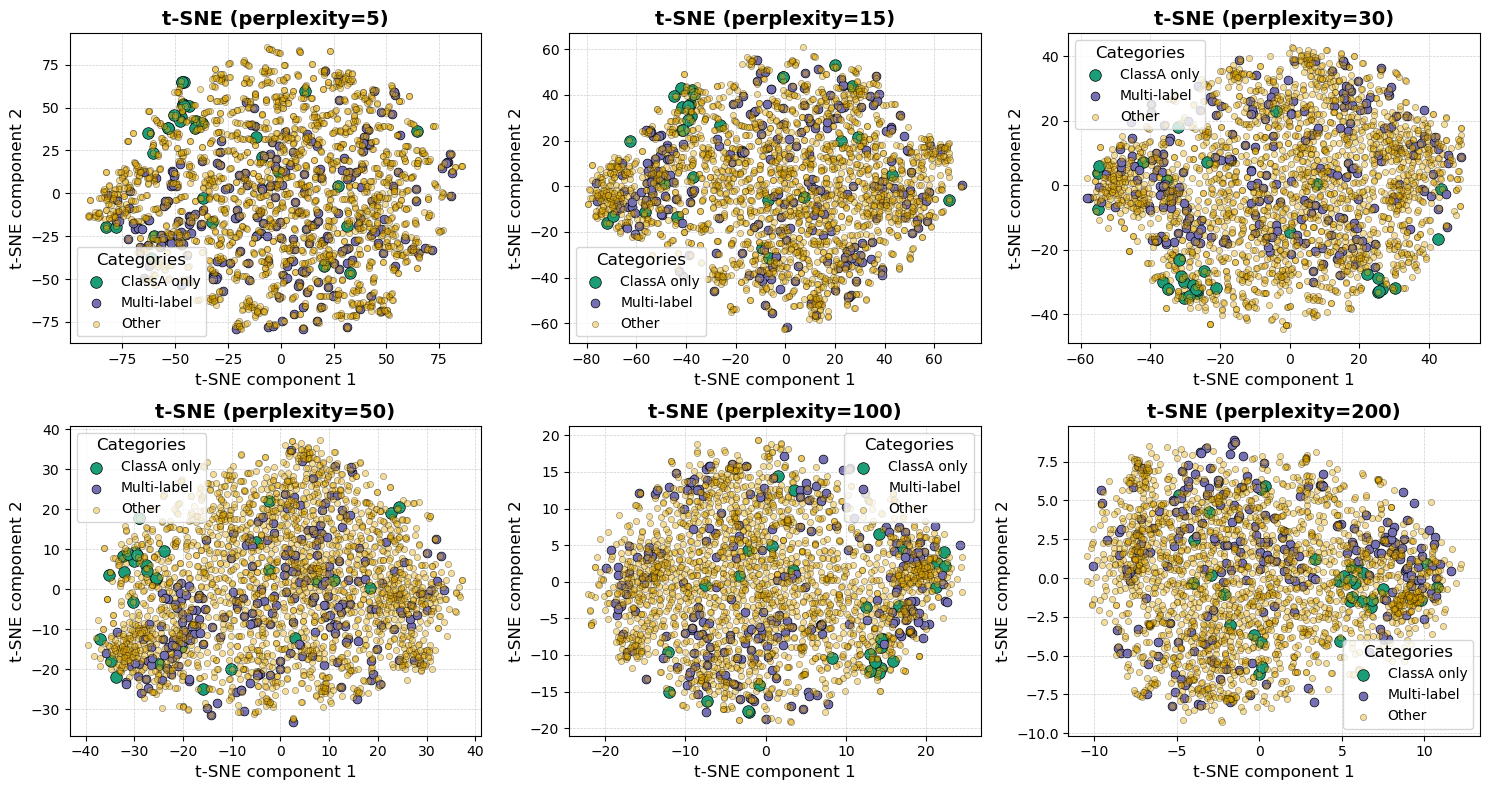

In [29]:
import math

n_plots = len(perplexities)
n_cols = 3
n_rows = math.ceil(n_plots / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))
axes = axes.ravel()  

colormap = plt.cm.Dark2
category_names = {0: 'ClassA only', 1: 'Multi-label', 2: 'Other'}
category_mapping = {"ClassA": 0, "MultiLabel": 1, "Other": 2}
color_categories = categorical_labels.map(category_mapping).values
colors = [colormap(i / 3) for i in range(3)]

for i, perplexity in enumerate(perplexities):
    X_tsne = tsne_results[perplexity]
    
    for category in [0, 1, 2]:
        mask = color_categories == category
        
        if category == 0:
            axes[i].scatter(X_tsne[mask, 0], X_tsne[mask, 1], 
                            c=[colors[category]], label=category_names[category], 
                            alpha=1.0, s=70, edgecolors='k', linewidth=0.5)
        elif category == 1:
            axes[i].scatter(X_tsne[mask, 0], X_tsne[mask, 1], 
                            c=[colors[category]], label=category_names[category], 
                            alpha=1.0, s=40, edgecolors='k', linewidth=0.5)
        else:
            axes[i].scatter(X_tsne[mask, 0], X_tsne[mask, 1], 
                            c=[colors[category]], label=category_names[category], 
                            alpha=0.4, s=20, edgecolors='k', linewidth=0.5)
    
    axes[i].set_title(f't-SNE (perplexity={perplexity})', fontsize=14, weight='bold')
    axes[i].set_xlabel('t-SNE component 1', fontsize=12)
    axes[i].set_ylabel('t-SNE component 2', fontsize=12)
    axes[i].grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)
    axes[i].legend(loc='best', fontsize=10, title='Categories', title_fontsize=12)

for j in range(n_plots, n_rows * n_cols):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

I'll use perplexity = 50. 
It seems to slightly preserve local structure. 

Small perplexity values (5-15) focus on local neighborhoods but can create artificial clusters and overfit noise, while larger values (30-100) consider broader structures, revealing global patterns and providing more stable visualizations for overlapping classes. A perplexity of 30 or 50 strikes a good balance between local and global structure, which is crucial when categories are mixed.

### Veracity inspection

In [30]:
X_tsne_final = tsne_results[50]

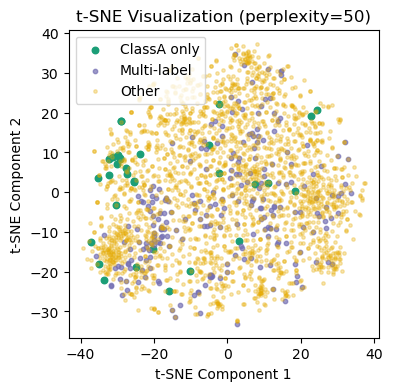

In [31]:
plt.figure(figsize=(4, 4))
color_map = plt.cm.Dark2
color_map = [color_map(i / 3) for i in range(3)]  

for category in [0, 1, 2]:
    mask = color_categories == category
    if category == 0:
        plt.scatter(X_tsne_final[mask, 0], X_tsne_final[mask, 1], 
                color=color_map[category], label=category_names[category], 
                alpha=1, s=22)
    elif category == 1:
        plt.scatter(X_tsne_final[mask, 0], X_tsne_final[mask, 1], 
                color=color_map[category], label=category_names[category], 
                alpha=0.7, s=10)
    else:
        plt.scatter(X_tsne_final[mask, 0], X_tsne_final[mask, 1], 
                color=color_map[category], label=category_names[category], 
                alpha=0.3, s=6)

plt.title(f't-SNE Visualization (perplexity=50)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()

The severe overlap in all t-SNE plots suggests:
1. The gene expression features may not clearly separate the functional categories
2. There might be substantial noise or ambiguity in the data
3. The functional categories may not correspond to distinct expression patterns

This aligns with the problem statement about data veracity issues:
- Noisy/Ambiguous Labels: Points from different categories are mixed together
- Hard-to-Learn Samples: Widespread mixing means many samples are ambiguous

In the t-SNE visualization (perplexity=50), data quality issues are evident in several ways. Noisy or ambiguous labels are particularly noticeable with ClassA points, which are scattered within clusters of other colors, making it hard to clearly distinguish them. However, there are no small islands of color isolated from the main clusters. Due to the lack of clear separation between classes, it is challenging to pinpoint outliers effectively, as there are no isolated or distant points at the plot's edges. 'Other' samples (e.g., Multi-label) are especially hard to learn, as their colors are often mixed with others, creating regions with complex, overlapping patterns. This makes it difficult for classifiers to differentiate between these categories.

1. Noisy / Ambiguous Labels:

In the plot, the green points (ClassA only) appear mostly in small clusters, but occasionally a green point is embedded in a dense cloud of yellow points (Other) or purple points (Multi-label).
These embedded points may indicate noisy or ambiguous labels, i.e., experiments where the dominant gene function label might not fully capture the true biological function.
Such points could confuse a classifier since they visually lie within regions of other functional categories.

2. Outliers:

A few isolated points, particularly some purple (Multi-label) and yellow (Other) points, are far away from the main clusters.
These may represent unusual gene expression profiles or experimental anomalies.
Outliers like these often require further inspection or possible cleaning because they can disproportionately affect model training.

3. Hard-to-Learn Samples:

There are dense regions where green, purple, and yellow points are thoroughly mixed, especially around the center of the plot.
These regions correspond to hard-to-learn samples, where the functional categories overlap heavily in feature space.
Any simple classifier (e.g., linear or distance-based) would likely struggle here because the boundaries between classes are not clear.

4. General Observations:

The t-SNE visualization captures local similarities well, showing some clustering of ClassA-only points.
However, global structure is not preserved, and the Multi-label points form a dispersed cloud, reflecting the complex, overlapping nature of gene expression patterns.

Conclusion:

This dataset exhibits clear label noise, outliers, and overlapping clusters, making multi-label classification challenging.
A classifier would need to handle these veracity issues carefully, possibly using robust or ensemble methods.

## C. Isomap and Manifolds

### Isomap

In [32]:
from sklearn.manifold import Isomap

In [33]:
isomap = Isomap(n_components=2, n_neighbors=30)

In [34]:
X_isomap = isomap.fit_transform(X_scaled)

In [35]:
print(f'Isomap transformation completed!')
print(f'Isomap coordinates shape: {X_isomap.shape}')

Isomap transformation completed!
Isomap coordinates shape: (2417, 2)


The key difference between Isomap and t-SNE lies in how they preserve data structure. t-SNE preserves local structure, focusing on neighborhood relationships, while Isomap preserves global structure by maintaining geodesic distances along the manifold. Isomap attempts to retain the true "walking distance" between points, whereas t-SNE emphasizes keeping similar points close together.

### Visualizing Isomap

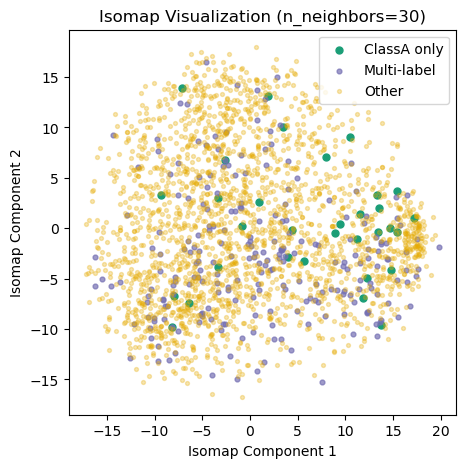

In [36]:
plt.figure(figsize=(5, 5))

color_map = plt.colormaps['Dark2']

for category in [0, 1, 2]:
    mask = color_categories == category
    if category == 0:
        plt.scatter(X_isomap[mask, 0], X_isomap[mask, 1], 
                    c=[color_map(category / 3)], label=category_names[category], 
                    alpha=1, s=25)
    elif category == 1:
        plt.scatter(X_isomap[mask, 0], X_isomap[mask, 1], 
                    c=[color_map(category / 3)], label=category_names[category], 
                    alpha=0.7, s=12)
    else:
        plt.scatter(X_isomap[mask, 0], X_isomap[mask, 1], 
                    c=[color_map(category / 3)], label=category_names[category], 
                    alpha=0.3, s=8)

plt.title('Isomap Visualization (n_neighbors=30)')
plt.xlabel('Isomap Component 1')
plt.ylabel('Isomap Component 2')
plt.legend()
plt.show()


### Comparison and Curvature

Isomap generally excels at preserving the global geometric structure of high-dimensional data by approximating the geodesic distances on the data manifold. Unlike t-SNE, which prioritizes local neighborhood relationships and often distorts global arrangements, Isomap attempts to unfold the underlying manifold, revealing broader patterns and cluster relationships across the dataset.

Therefore, Isomap is better suited for visualizing the global structure of the gene expression data, as it captures the overall shape and connectivity between clusters more faithfully. This makes it useful for understanding how different gene expression profiles relate at a global scale, potentially highlighting transitions or gradients between biological states that t-SNE might fragment.

The Isomap plot suggests that the data manifold is highly curved and complex, rather than being a simple, flat subspace. This curvature reflects nonlinear relationships in the gene expression patterns, where points that seem close in Euclidean space may lie far apart along the manifold itself.

Such a complex manifold implies that the data is intrinsically nonlinear and structured in a way that challenges linear methods. The high curvature and intricate topology can increase the difficulty of classification, as simple linear boundaries cannot capture the true separation between classes. Instead, classifiers must account for the manifold geometry—using nonlinear methods or manifold-aware techniques—to achieve robust performance.

The final comparison between t-SNE and Isomap highlights key differences in data visualization and manifold structure. t-SNE (perplexity=50) showed widespread mixing of categories, emphasizing local neighborhood relationships and suggesting poor separability and noisy labels. In contrast, Isomap (n_neighbors=30) revealed the global structure, with A points embedded in the other class half and better category separation, effectively unfolding the underlying data manifold.

The difference between the two methods indicates that the gene expression data lies on a highly curved, non-linear manifold, where simple Euclidean distances fail to capture true relationships. Isomap is better for understanding overall data organization, while t-SNE excels at identifying local clusters and outliers. The complex manifold explains the difficulty in classification—linear classifiers would struggle, while non-linear methods like neural networks or kernel SVMs are essential.

From a biological perspective, the curved manifold suggests that gene function relationships are non-linear and complex. Small expression changes in certain genes can lead to large functional differences, and vice versa.
